In [1]:
import pandas as pd
df = pd.read_csv('Crab_molt.csv')
df


,post molt size,pre molt size
0,127.7,113.6
1,133.2,118.1
2,135.3,119.9
3,143.3,126.2
4,139.3,126.7
...,...,...
467,150.3,135.9
468,151.2,135.6
469,143.5,129.6
470,148.3,134.1


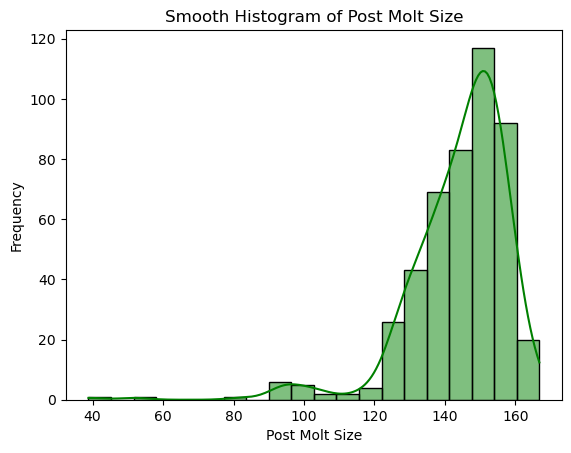

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the smooth histogram
sns.histplot(df['post molt size'], kde=True, color='green', bins=20)

# Customize and show the plot
plt.xlabel('Post Molt Size')
plt.ylabel('Frequency')
plt.title('Smooth Histogram of Post Molt Size')
plt.show()


In [3]:
# Extracting the 'post molt size' column and calculating statistics
stats = {
    'Minimum': df['post molt size'].min(),
    'Maximum': df['post molt size'].max(),
    'Median': df['post molt size'].median(),
    'Mean': df['post molt size'].mean(),
    'Skewness': df['post molt size'].skew(),
    'Kurtosis': df['post molt size'].kurtosis()
}

# Displaying the results
for stat, value in stats.items():
    print(f'{stat}: {value}')


Minimum: 38.8
Maximum: 166.8
Median: 147.4
Mean: 143.89766949152542
Skewness: -2.354390947858422
Kurtosis: 10.23684737910977


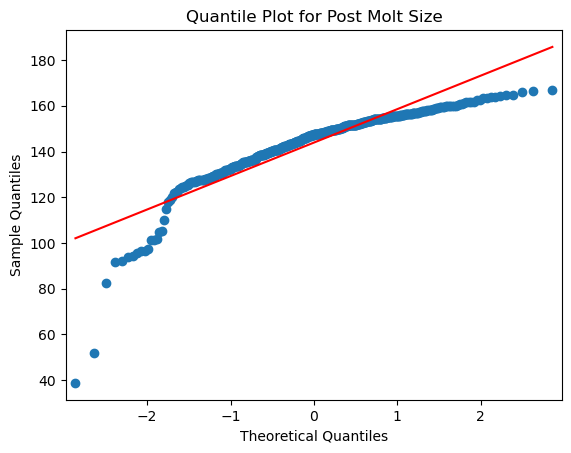

In [4]:

import statsmodels.api as sm

# Extracting the 'post_molt_size' column
post_molt_size_data = df['post molt size']

# Creating a quantile plot
sm.qqplot(post_molt_size_data, line='s')

# Set plot labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Quantile Plot for Post Molt Size')

# Show the plot
plt.show()


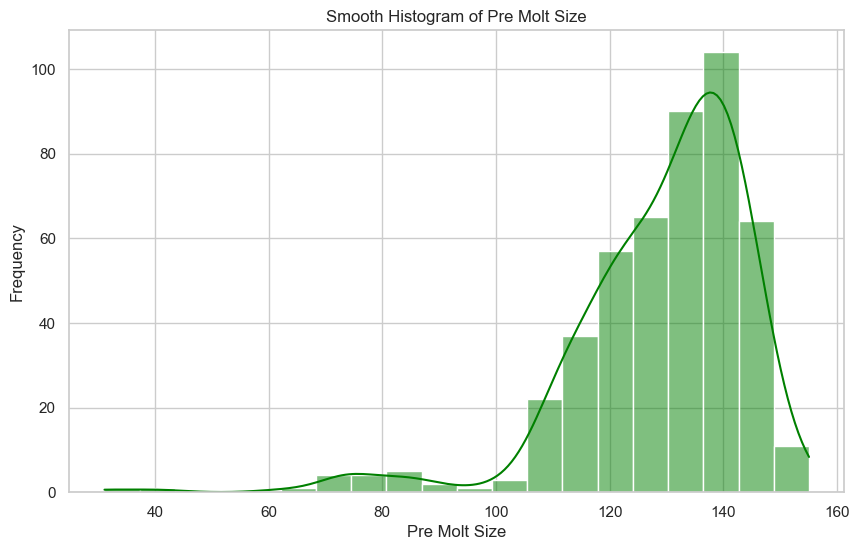

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the smooth histogram
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df, x='pre molt size', kde=True, color='green', bins=20)

# Customize labels and title
plt.xlabel('Pre Molt Size')
plt.ylabel('Frequency')
plt.title('Smooth Histogram of Pre Molt Size')

# Display the plot
plt.show()


In [6]:
# Calculating statistics for 'pre molt size'
pre_molt_size_data = df['pre molt size']
stats = {
    'Minimum': pre_molt_size_data.min(),
    'Maximum': pre_molt_size_data.max(),
    'Median': pre_molt_size_data.median(),
    'Mean': pre_molt_size_data.mean(),
    'Skewness': pre_molt_size_data.skew(),
    'Kurtosis': pre_molt_size_data.kurtosis()
}

# Displaying the results
for stat, value in stats.items():
    print(f'{stat}: {value}')


Minimum: 31.1
Maximum: 155.1
Median: 132.8
Mean: 129.21186440677965
Skewness: -2.0098801542639126
Kurtosis: 6.851369760728378


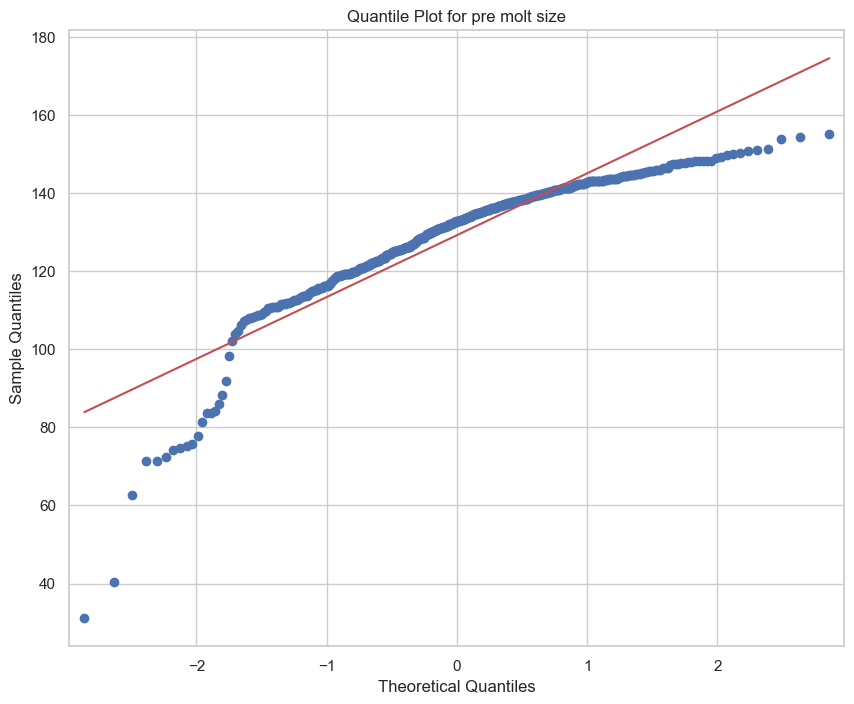

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define a function to create a quantile plot
def create_quantile_plot(data, column_name):
    plt.figure(figsize=(10, 8))
    sm.qqplot(data[column_name], line='s', ax=plt.gca())
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'Quantile Plot for {column_name}')
    plt.show()

# Extract the 'pre molt size' column and create the plot
create_quantile_plot(df, 'pre molt size')


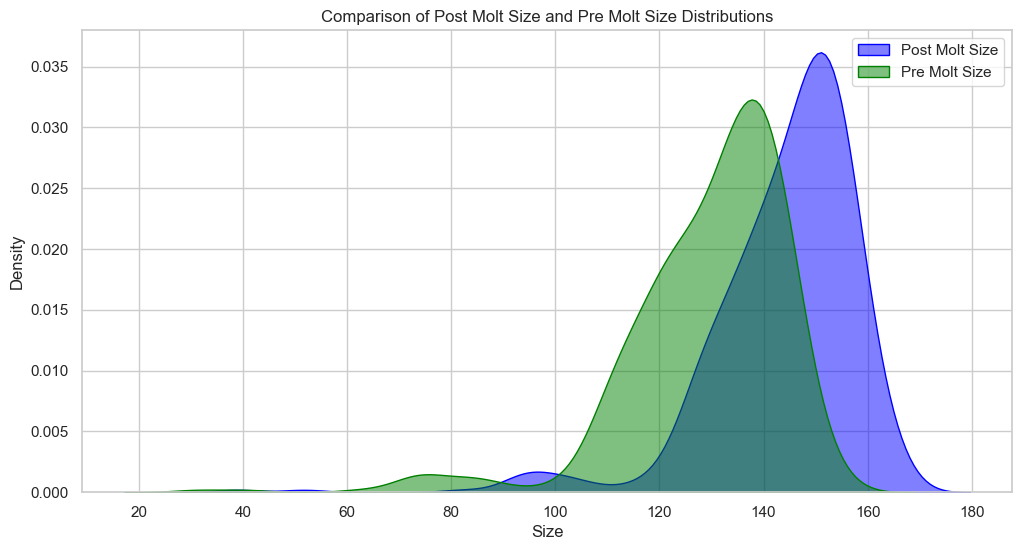

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and create the figure
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the kernel density estimates
for col, color in zip(['post molt size', 'pre molt size'], ['blue', 'green']):
    sns.kdeplot(df[col], label=col.replace('_', ' ').title(), fill=True, alpha=0.5, color=color)

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Density')
plt.title('Comparison of Post Molt Size and Pre Molt Size Distributions')
plt.legend()

# Show the plot
plt.show()


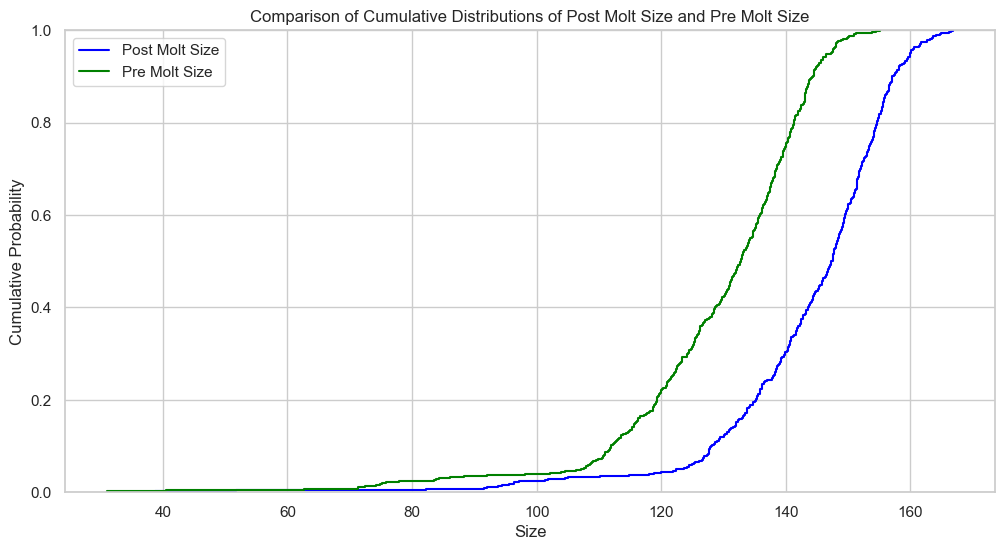

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and create the figure
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creating cumulative distribution plots with different colors
colors = ['blue', 'green']
for col, label, color in zip(['post molt size', 'pre molt size'], ['Post Molt Size', 'Pre Molt Size'], colors):
    sns.ecdfplot(data=df, x=col, label=label, color=color)

# Set labels and title
plt.xlabel('Size')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Cumulative Distributions of Post Molt Size and Pre Molt Size')
plt.legend()

# Show the plot
plt.show()


In [10]:
import numpy as np

# Function to calculate Cohen's d
def calculate_cohens_d(group1, group2):
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Extract data
data = {
    'post_molt_size': df['post molt size'],
    'pre_molt_size': df['pre molt size']
}

# Calculate Cohen's d
cohens_d = calculate_cohens_d(data['post_molt_size'], data['pre_molt_size'])

# Print the result
print(f"Cohen's d for Post Molt Size and Pre Molt Size: {cohens_d}")


Cohen's d for Post Molt Size and Pre Molt Size: 0.9620678692342477


In [11]:
import numpy as np

# Extract pre-molt and post-molt size data
pre_molt_size = df['pre molt size']
post_molt_size = df['post molt size']

# Calculate the observed test statistic (difference in means)
observed_statistic = np.mean(post_molt_size) - np.mean(pre_molt_size)

# Permutation test
num_permutations = 5000
perm_test_statistics = np.zeros(num_permutations)

for i in range(num_permutations):
    # Shuffle and calculate the test statistic for permuted data
    combined_data = np.concatenate((pre_molt_size, post_molt_size))
    np.random.shuffle(combined_data)
    perm_test_statistics[i] = np.mean(combined_data[:len(pre_molt_size)]) - np.mean(combined_data[len(pre_molt_size):])

# Calculate p-value
p_value = (np.abs(perm_test_statistics) >= np.abs(observed_statistic)).mean()

# Print the results
print(f"Observed Statistic: {observed_statistic}")
print(f"P-value: {p_value}")



Observed Statistic: 14.685805084745766
P-value: 0.0


In [13]:
from scipy.stats import ttest_ind

# Extracting size data
sizes = {
    'pre_molt': df['pre molt size'],
    'post_molt': df['post molt size']
}

# Performing t-test
t_statistic, p_value = ttest_ind(sizes['pre_molt'], sizes['post_molt'], equal_var=False)

# Displaying the results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Checking for statistical significance
alpha = 0.05
result = "statistically significant" if p_value < alpha else "not statistically significant"
print(f"The mean difference is {result}.")

T-Statistic: -14.779567045859308
P-Value: 1.392686580034457e-44
The mean difference is statistically significant.
